### NAME
Shallom Githui
### TECHNICAL MENTOR
Diana Mongina

# Unlocking Future Stars: Predicting High-Potential Football Players with Machine Learning

## PROJECT OVERVIEW

Smart scouting is pretty important especially if it's outshining a big budget.Sifting through thousands of young players worldwide, all while working with a tight budget can be quite a challenge. You need to know: Which of these kids will grow into a world-class player? Miss a future star, and you lose a chance to build a legacy. Sign the wrong player, and you waste millions. It’s a high-stakes gamble, and the pressure is on.

That’s where my project comes in. I’ve harnessed the power of data science to act like your ultimate scouting assistant.Using a massive dataset from the FIFA 21 game, packed with details on over 18,000 players—think skills, market value, and more—I’ve built a tool to predict which young players, aged 23 or under, have what it takes to reach the elite level, like a Lionel Messi or Kylian Mbappé. The model doesn’t just guess; it learns patterns from the data to spot players with that special potential, even if they’re flying under the radar. 



##  OBJECTIVES

The key objectives to be achieved by this study are as follows:

1. **Find Young Players Who Can Become Stars**: Build a tool to predict which players aged 23 or younger are likely to reach an elite level (Overall Rating ≥ 80), helping the club spot future top performers early.

2. **Save Money and Time in Scouting**: Create a model that shortlists the most promising players, so the scouting team can focus on the best targets without wasting resources on less likely prospects.

3. **Give the Club a Competitive Edge**: Use data to identify undervalued players before bigger clubs notice them, allowing the club to sign talent at a lower cost and build a stronger team.

## DATA UNDERSTANDING



The data contains key columns for the analysis.

**.** ↓OVA (Overall Rating): The player’s current skill level (0–100), reflecting their overall performance. A key predictor, as players with higher current ratings are more likely to reach elite status.

**.** POT (Potential Rating): The player’s maximum expected rating in the future (0–100). Used to create the High_Potential target variable.

**.** Value: The player’s market value in euros (e.g., €5M). Indicates market demand and strongly correlates with potential.

**.** Wage: The player’s weekly wage in euros (e.g., €10K). Reflects current recognition and predicts future stardom.

**.** Attacking: Aggregate score of attacking skills (e.g., Crossing, Finishing), critical for forwards and wingers.

**.** Skill: Aggregate score of technical skills (e.g., Dribbling, Ball Control), vital for midfielders and attackers.

**.** Movement: Aggregate score of speed and agility (e.g., Sprint Speed, Acceleration), important for dynamic players.

**.** Power: Aggregate score of physical attributes (e.g., Strength, Stamina), key for physical play.

**.** Mentality: Aggregate score of mental attributes (e.g., Vision, Composure), crucial for decision-making.

**.** Defending: Aggregate score of defensive skills (e.g., Tackling, Marking), essential for defenders.

**.** W/F (Weak Foot): Ability to use the weaker foot (1–5). Higher values indicate versatility.

**.** SM (Skill Moves): Ability to perform dribbling tricks (1–5). Higher values reflect flair.

**.** A/W (Attacking Work Rate): Effort in attacking play (Low, Medium, High). Influences offensive contribution.

**.** D/W (Defensive Work Rate): Effort in defensive tasks (Low, Medium, High). Impacts defensive reliability.

**.** IR (International Reputation): Global fame (1–5). Higher values suggest established potential.

**.** Height: Player’s height in inches. Affects physical presence.

**.** Weight: Player’s weight in pounds. Influences strength and balance.

**.** foot: Preferred foot (Left = 0, Right = 1). Impacts positional suitability.



I am going to start by cleaning and understanding the data, then proceed with the evaluation and modeling process.

In [2]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
fifa = pd.read_csv('/home/user/Documents/Flatiron/fifa data/fifa21_raw_data.csv')
fifa.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
#Checking the columns in the DataFrame
fifa.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [5]:
#Checking the shape of the DataFrame
fifa.shape

(18979, 77)

In [6]:
#checking the summary of the DataFrame
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [7]:
#dropping the irrelevant columns
fifa_df = fifa.drop(columns=['photoUrl', 'playerUrl', 'Loan Date End', 'BP',
                             'LongName', 'Nationality', 'Positions', 'Team & Contract', 'ID', 'Joined'])

In [8]:
#checking the new fifa_df DataFrame
fifa_df.head(10)

,Name,Age,↓OVA,POT,Height,Weight,foot,BOV,Growth,Value,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,L. Messi,33,93,93,"5'7""",159lbs,Left,93,0,€67.5M,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,Cristiano Ronaldo,35,92,92,"6'2""",183lbs,Right,92,0,€46M,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,J. Oblak,27,91,93,"6'2""",192lbs,Right,91,2,€75M,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,K. De Bruyne,29,91,91,"5'11""",154lbs,Right,91,0,€87M,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,Neymar Jr,28,91,91,"5'9""",150lbs,Right,91,0,€90M,...,High,Medium,5 ★,91,85,86,94,36,59,\n273
5,R. Lewandowski,31,91,91,"6'0""",176lbs,Right,91,0,€80M,...,High,Medium,4 ★,78,91,78,85,43,82,\n182
6,K. Mbappé,21,90,95,"5'10""",161lbs,Right,91,5,€105.5M,...,High,Low,3 ★,96,86,78,91,39,76,\n646
7,Alisson,27,90,91,"6'3""",201lbs,Right,90,1,€62.5M,...,Medium,Medium,3 ★,86,88,85,89,51,91,\n79
8,M. Salah,28,90,90,"5'9""",157lbs,Left,90,0,€78M,...,High,Medium,3 ★,93,86,81,90,45,75,\n164
9,S. Mané,28,90,90,"5'9""",152lbs,Right,90,0,€78M,...,High,Medium,3 ★,94,85,80,90,44,76,\n170


In [9]:
print(fifa_df.shape)
print(fifa_df.info())

(18979, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              18979 non-null  object
 1   Age               18979 non-null  int64 
 2   ↓OVA              18979 non-null  int64 
 3   POT               18979 non-null  int64 
 4   Height            18979 non-null  object
 5   Weight            18979 non-null  object
 6   foot              18979 non-null  object
 7   BOV               18979 non-null  int64 
 8   Growth            18979 non-null  int64 
 9   Value             18979 non-null  object
 10  Wage              18979 non-null  object
 11  Release Clause    18979 non-null  object
 12  Attacking         18979 non-null  int64 
 13  Crossing          18979 non-null  int64 
 14  Finishing         18979 non-null  int64 
 15  Heading Accuracy  18979 non-null  int64 
 16  Short Passing     18979 non-null  int64 
 17  

In [10]:
#checking for null values
fifa_df.isnull().sum()

Name      0
Age       0
↓OVA      0
POT       0
Height    0
         ..
PAS       0
DRI       0
DEF       0
PHY       0
Hits      0
Length: 67, dtype: int64

In [11]:
# Remove the star in IR column (international reputation, global fame) if the columns are strings
if fifa_df['IR'].dtype == 'object':
	fifa_df['IR'] = fifa_df['IR'].str.replace('★', '').astype(int)
if fifa_df['SM'].dtype == 'object':
	fifa_df['SM'] = fifa_df['SM'].str.replace('★', '').astype(int)
if fifa_df['W/F'].dtype == 'object':
	fifa_df['W/F'] = fifa_df['W/F'].str.replace('★', '').astype(int)

# Checking the unique values in the IR column
print(fifa_df['IR'].unique())


[5 3 4 2 1]


In [12]:
fifa_df.head(3)

,Name,Age,↓OVA,POT,Height,Weight,foot,BOV,Growth,Value,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,L. Messi,33,93,93,"5'7""",159lbs,Left,93,0,€67.5M,...,Medium,Low,5,85,92,91,95,38,65,\n372
1,Cristiano Ronaldo,35,92,92,"6'2""",183lbs,Right,92,0,€46M,...,High,Low,5,89,93,81,89,35,77,\n344
2,J. Oblak,27,91,93,"6'2""",192lbs,Right,91,2,€75M,...,Medium,Medium,3,87,92,78,90,52,90,\n86


In [13]:
# Convert monetary columns
def convert_money(value):
        if isinstance(value, str):
            value = value.replace('€', '')
            if 'M' in value:
                return float(value.replace('M', '')) * 1_000_000
            elif 'K' in value:
                return float(value.replace('K', '')) * 1_000
            return float(value)
        return value
    
for col in ['Value', 'Wage', 'Release Clause']:
    fifa_df[col] = fifa_df[col].apply(convert_money)

In [14]:
# Convert height to inches before converting to integer
def convert_height_to_inches(height):
	if isinstance(height, str):
		feet, inches = height.split("'")
		inches = inches.replace('"', '')
		return int(feet) * 12 + int(inches)
	return height

fifa_df['Height'] = fifa_df['Height'].apply(convert_height_to_inches).astype(int)

In [15]:

  # Convert weight
fifa_df['Weight'] = fifa_df['Weight'].str.replace('lbs', '').astype(float)

In [16]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              18979 non-null  object 
 1   Age               18979 non-null  int64  
 2   ↓OVA              18979 non-null  int64  
 3   POT               18979 non-null  int64  
 4   Height            18979 non-null  int64  
 5   Weight            18979 non-null  float64
 6   foot              18979 non-null  object 
 7   BOV               18979 non-null  int64  
 8   Growth            18979 non-null  int64  
 9   Value             18979 non-null  float64
 10  Wage              18979 non-null  float64
 11  Release Clause    18979 non-null  float64
 12  Attacking         18979 non-null  int64  
 13  Crossing          18979 non-null  int64  
 14  Finishing         18979 non-null  int64  
 15  Heading Accuracy  18979 non-null  int64  
 16  Short Passing     18979 non-null  int64 

In [17]:
# Convert categorical columns
def convert_categorical_columns(fifa_df):
	fifa_df['foot'] = fifa_df['foot'].map({'Right': 1, 'Left': 0})
	fifa_df['A/W'] = fifa_df['A/W'].map({'High': 2, 'Medium': 1, 'Low': 0})
	fifa_df['D/W'] = fifa_df['D/W'].map({'High': 2, 'Medium': 1, 'Low': 0})
	return fifa_df

# Apply the function
fifa_df = convert_categorical_columns(fifa_df)

In [18]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              18979 non-null  object 
 1   Age               18979 non-null  int64  
 2   ↓OVA              18979 non-null  int64  
 3   POT               18979 non-null  int64  
 4   Height            18979 non-null  int64  
 5   Weight            18979 non-null  float64
 6   foot              18979 non-null  int64  
 7   BOV               18979 non-null  int64  
 8   Growth            18979 non-null  int64  
 9   Value             18979 non-null  float64
 10  Wage              18979 non-null  float64
 11  Release Clause    18979 non-null  float64
 12  Attacking         18979 non-null  int64  
 13  Crossing          18979 non-null  int64  
 14  Finishing         18979 non-null  int64  
 15  Heading Accuracy  18979 non-null  int64  
 16  Short Passing     18979 non-null  int64 

### DATA ANALYSIS
Creating a function named perform_eda(Exploratory Data Analysis) will aid in analysing  the fifa_df dataset by providing an overview of the dataset and analyzing the distribution of the specific target column named High_potential.

In [19]:
def perform_eda(fifa_df):
    print("=== Dataset Overview ===")
    print(fifa_df.info())
    print("\n=== Target Distribution ===")
    print(fifa_df['High_Potential'].value_counts(normalize=True))

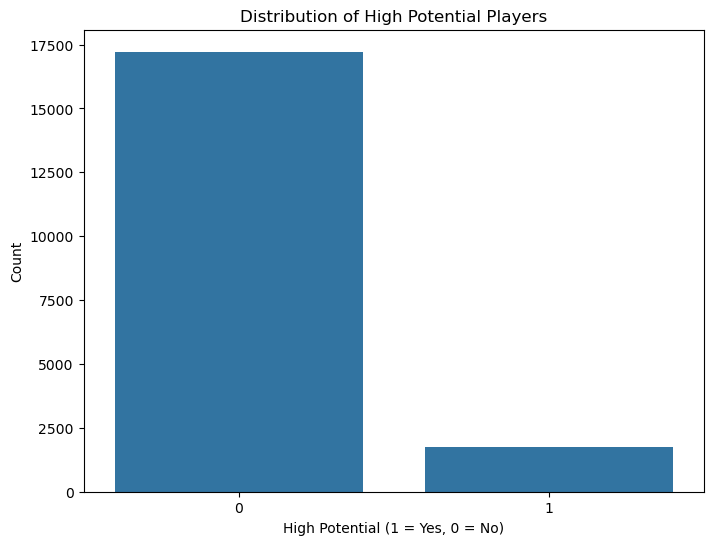

In [20]:
# Create target variable
fifa_df['High_Potential'] = (fifa_df['POT'] >= 80).astype(int)

# Plot target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='High_Potential', data=fifa_df)
plt.title('Distribution of High Potential Players')
plt.xlabel('High Potential (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

**.** 0 represents players who are not considered to have high potential.

**.** 1 represents players who are considered to have high potential.

The bar for 0 is significantly taller showing most players are in this category.

The bar for 1 is significantly shorter indicating a small propotion of players are classified as high potential.

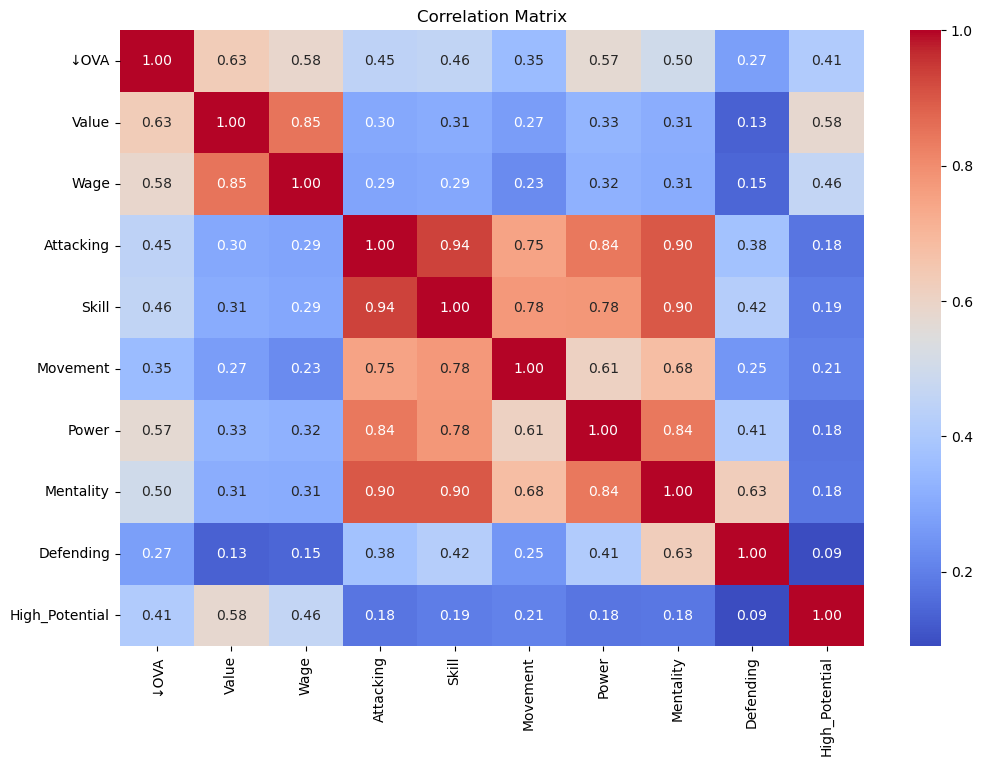

In [21]:
# Plot correlation matrix for key features
key_features = ['↓OVA', 'Value', 'Wage', 'Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Defending', 'High_Potential']
plt.figure(figsize=(12, 8))
sns.heatmap(fifa_df[key_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**Correlations with `High_Potential`**:
   - `High_Potential` has relatively weak correlations with most features:
     - `Value` (`0.58`) and `↓OVA` (`0.41`) show the strongest relationships, suggesting that players with high potential tend to have higher overall ratings and market values.
     - Other features like `Defending` (`0.09`) and `Mentality` (`0.18`) have very weak correlations, indicating that these attributes are not strongly predictive of high potential.

- Weak correlations with `High_Potential` suggest that additional features or transformations might be needed to improve predictive modeling for this target variable.

### DATA MODELING

In [22]:
def build_and_evaluate_models(fifa_df):
    # Prepare features and target
    y = fifa_df['High_Potential']


In [23]:
# Define X as the feature matrix
X = fifa_df.drop(columns=['High_Potential'])

# Check for non-numeric columns in X
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
        print(f"Error: Non-numeric columns in X: {non_numeric_cols}")
        X = X.select_dtypes(include=[np.number])

Error: Non-numeric columns in X: Index(['Name', 'Hits'], dtype='object')


In [24]:
# Train-test split 
# use stratified sampling to ensure ratio is maintained in both subsets
X_train, X_test, y_train, y_test = train_test_split(X, fifa_df['High_Potential'], test_size=0.2, random_state=42, stratify=fifa_df['High_Potential'])


In [25]:
# Initialize results dictionary
results = {}

In [26]:
#Model  1
# Build and evaluate the logistic regression pipeline
pipeline_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=42))
    ])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

results['Baseline Logistic Regression'] = {
        'report': classification_report(y_test, y_pred_lr, output_dict=True),
        'roc_auc': roc_auc_score(y_test, pipeline_lr.predict_proba(X_test)[:, 1])
    }

In [27]:
print("=== Logistic Regression Results ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", results['Baseline Logistic Regression']['roc_auc'])

=== Logistic Regression Results ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3444
           1       1.00      1.00      1.00       352

    accuracy                           1.00      3796
   macro avg       1.00      1.00      1.00      3796
weighted avg       1.00      1.00      1.00      3796

ROC AUC Score: 1.0


The ROC AUC Score is 1.0 meaning the model is performing well in the classification of the players. 

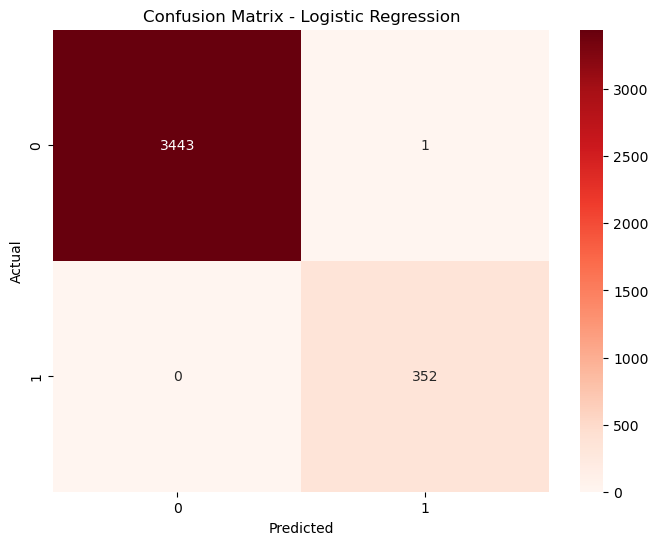

In [28]:
#Confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model predicts 3443 TN and 352 TP. It also shows that 1 was a FN prediction and 0 FP. The model predicts more TN than TP.

In [29]:
# Model 2
# Calculate class weights to handle imbalance
# Weight minority class higher
class_weight = {0: 1, 1: sum(y_train == 0) / sum(y_train == 1)}  
    
pipeline_lr_tuned = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(class_weight=class_weight, random_state=42, max_iter=1000))
    ])

In [30]:
#set up the parameter grid for hyperparameter tuning
param_grid_lr = {
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100], 
        'model__solver': ['liblinear', 'lbfgs'],  
        'model__penalty': ['l2']  
    }
grid_lr = GridSearchCV(
        pipeline_lr_tuned,
        param_grid_lr,
        cv=5,
        scoring='recall', 
        n_jobs=-1,
        error_score='raise'
    )

grid_lr.fit(X_train, y_train)
y_pred_lr_tuned = grid_lr.predict(X_test)
y_proba_lr_tuned = grid_lr.predict_proba(X_test)[:, 1] 
    
results['Tuned Logistic Regression'] = {
        'report': classification_report(y_test, y_pred_lr_tuned, output_dict=True),
        'roc_auc': roc_auc_score(y_test, y_proba_lr_tuned),
        'best_params': grid_lr.best_params_
    }

In [31]:
print("=== Tuned Logistic Regression Results ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_tuned))
print("ROC AUC Score:", results['Tuned Logistic Regression']['roc_auc'])


=== Tuned Logistic Regression Results ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3444
           1       0.77      1.00      0.87       352

    accuracy                           0.97      3796
   macro avg       0.89      0.98      0.93      3796
weighted avg       0.98      0.97      0.97      3796

ROC AUC Score: 0.9999158615774469


The ROC AUC Score is 0.999 which is closer to 1.0 indicating the model is fit.

In [32]:
# Model 3: Tuned Decision Tree
pipeline_dt = Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeClassifier(random_state=42))
    ])
    
param_grid_dt = {
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10]
    }
grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='recall', n_jobs=-1)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.predict(X_test)
results['Tuned Decision Tree'] = {
        'report': classification_report(y_test, y_pred_dt, output_dict=True),
        'roc_auc': roc_auc_score(y_test, grid_dt.predict_proba(X_test)[:, 1]),
        'best_params': grid_dt.best_params_
    }

In [33]:
# Extract player names for the test set
names_test = fifa_df.loc[X_test.index, 'Name']

# Generate ranked list of players (test set) by probability
player_ranking = pd.DataFrame({
        'Name': names_test,
        'True_Label': y_test,
        'Predicted_Probability': y_proba_lr_tuned
    }).sort_values(by='Predicted_Probability', ascending=False)
    
print("Top 10 Players Predicted as High-Potential")
print(player_ranking.head(10)[['Name', 'Predicted_Probability', 'True_Label']])

Top 10 Players Predicted as High-Potential
               Name  Predicted_Probability  True_Label
6         K. Mbappé                    1.0           1
11    M. ter Stegen                    1.0           1
0          L. Messi                    1.0           1
62       K. Havertz                    1.0           1
9           S. Mané                    1.0           1
66      M. Rashford                    1.0           1
99       E. Haaland                    1.0           1
33  Bruno Fernandes                    1.0           1
23          H. Kane                    1.0           1
70          L. Sané                    1.0           1


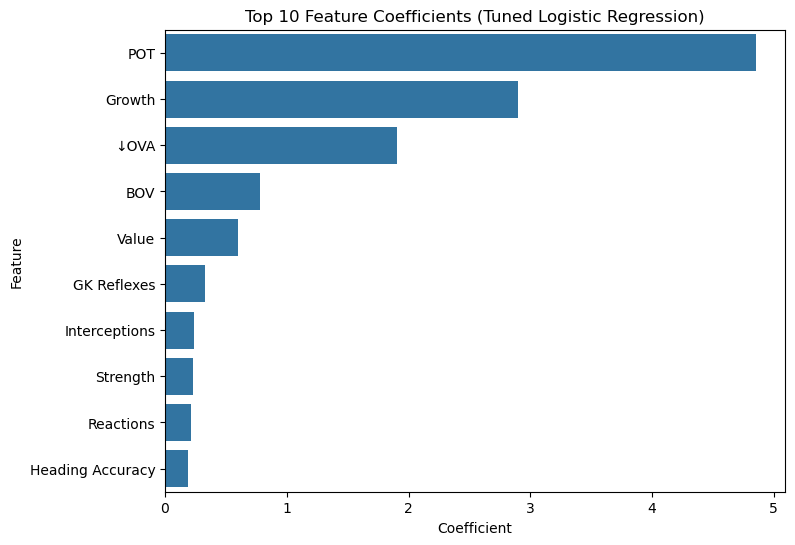

In [34]:
# Feature importance for Tuned Logistic Regression (coefficients)
lr_coef = grid_lr.best_estimator_.named_steps['model'].coef_[0]
feature_importance_lr = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lr_coef
    }).sort_values(by='Coefficient', ascending=False).head(10)

# Plotting feature importance for Tuned Logistic Regression
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.title('Top 10 Feature Coefficients (Tuned Logistic Regression)')
plt.show()

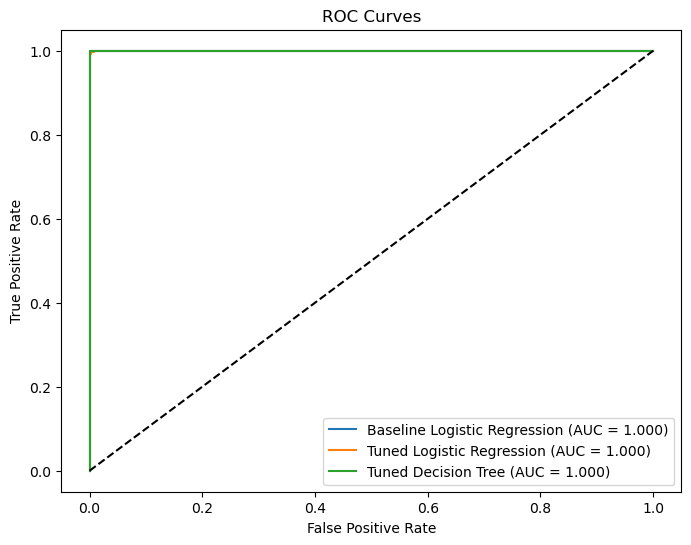

In [35]:
# ROC Curve
plt.figure(figsize=(8, 6))
for name, model in [('Baseline Logistic Regression', pipeline_lr), ('Tuned Logistic Regression', grid_lr), ('Tuned Decision Tree', grid_dt)]:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.savefig('roc_curves.png')
plt.show()

All models are highly effective achieving perfect classification.

In [36]:
def get_results():
	return X_train, X_test, y_train, y_test, results, grid_lr

In [37]:
# Example execution
if __name__ == "__main__":
    X_train, X_test, y_train, y_test, results, final_model = get_results()

In [38]:
#save the fifa_df for future use in tableau
fifa_df.to_csv('/home/user/Documents/Flatiron/fifa data/fifa21_cleaned_data.csv', index=False)

### RECOMMENDATIONS

**1.** Prioritize Top-Ranked Players: Use the model to target the top 20 players with predicted probabilities ≥ 0.8 in the 2025 summer transfer window. For example, scout players like those ranked alongside Kylian Mbappé (e.g., probability ~0.95) for immediate evaluation. Arrange trials or watch game footage to confirm their potential.


**2.** Streamline Scouting Workflow: Assign scouts to evaluate only the top 50 players from the analysis focusing on those with Value between €5M and €10M. This reduces travel and analysis costs compared to scouting hundreds of players. For example, a player with a €7M value and 0.90 probability is a high-priority, cost-effective target.

**3.** Sign Players Aged 18–20: Target players aged 18–20 with Value ≤ €5M and predicted probabilities ≥ 0.75, as they offer the best long-term investment. For example, a 19-year-old with ↓OVA = 62 and 0.80 probability could be signed for €3M and sold for €20M+ in three years if they reach POT = 80.